## Imports and Helper Functions

In [3]:
import pandas as pd
import mplleaflet
import mapclassify
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

# Replace any number of spaces with just a single space
def refineSpaces(x):
    return x.replace('\s+', ' ', regex=True)

# Remove leading and trailing white space
def removeExcessWhitespace(x):
    return x.str.strip()

# Convert the string to uppercase
def toUpper(x):
    return x.str.upper()


## Read in Data

In [4]:
avocadoData = pd.read_csv('avocado-with-regions.csv')
avocadoData = pd.DataFrame(avocadoData, columns=['region', 'AveragePrice'])

# Map the given regions to their corresponding larger region
avocadoData['region'] = np.where(avocadoData['region'] == 'GreatLakes', 'MIDWEST', avocadoData['region'])
avocadoData['region'] = np.where(avocadoData['region'] == 'MidSouth', 'SOUTH', avocadoData['region'])
avocadoData['region'] = np.where(avocadoData['region'] == 'SouthCentral', 'SOUTH', avocadoData['region'])
avocadoData['region'] = np.where(avocadoData['region'] == 'SouthEast', 'SOUTH', avocadoData['region'])

# Get average price for that region and make it uppercase
avgPriceByRegion = avocadoData.groupby(['region']).mean().reset_index()
avgPriceByRegion['region'] = avgPriceByRegion['region'].str.upper()

# read in all the geojson files
midwest = gpd.read_file('geojson/us-regions/Midwest.geojson')
northeast = gpd.read_file('geojson/us-regions/Northeast.geojson')
south = gpd.read_file('geojson/us-regions/South.geojson')
west = gpd.read_file('geojson/us-regions/West.geojson')

# concetenate them together and change the id(region) to uppercase
regions = pd.concat([midwest, northeast, south, west])
regions['id'] = regions['id'].str.upper()



print("Done reading data.")


Done reading data.


# Merge in regions

In [5]:

merged = pd.merge(avgPriceByRegion, regions,  how='inner', left_on='region', right_on='id')

print("Done merging data frames.")


Done merging data frames.


## Plot violations and shape data

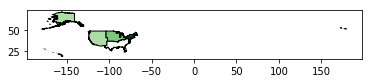

In [6]:
# legend cannot be shown to mplleaflet. comment out the first one if youre plotting to mflleaflet
#ax = GeoDataFrame(merged).plot(column='Mean income (dollars); Estimate; All households',  cmap='Blues', scheme='QUANTILES', k=6, figsize=(36, 36), legend=True)
ax = GeoDataFrame(merged).plot(column='AveragePrice', edgecolor='black', cmap='Greens')

#ax.figure.savefig('generated/mean-income-2015.png', dpi=300)
plt.show()
mplleaflet.save_html(fig=ax.figure, fileobj='generated/map-by-region.html')
